In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/CelebAMask-HQ.zip",'r') as z:
  z.extractall()

In [3]:
import cv2
import numpy as np
import dlib

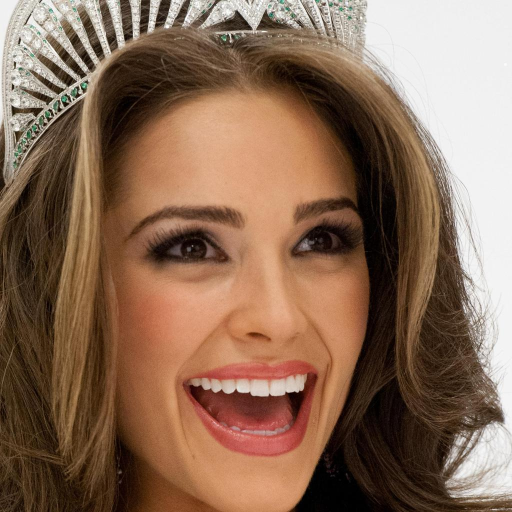

In [43]:
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/CelebAMask-HQ/CelebA-HQ-img/0.jpg")
img = cv2.resize(img,(0,0),None,0.5,0.5)
imgOriginal = img.copy()
cv2_imshow(imgOriginal)

In [23]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2021-02-06 18:10:06--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  21.9MB/s    in 2.8s    

2021-02-06 18:10:09 (21.9 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [66]:
def createBox(img,point1,point2,point3,scale=5,masked=False,cropped=True):
  if masked:
    mask1 = np.zeros_like(img)
    mask1 = cv2.fillPoly(mask1,[point1],(255,255,255))
    mask2 = np.zeros_like(img)
    mask2 = cv2.fillPoly(mask2,[point2],(255,255,255))
    mask3 = np.zeros_like(img)
    mask3 = cv2.fillPoly(mask3,[point3],(255,255,255))
    mask = cv2.bitwise_or(mask1,mask2)
    mask = cv2.bitwise_or(mask,mask3)
    #cv2_imshow(mask)
  if cropped:
    bbox = cv2.boundingRect(point1)
    x,y,w,h = bbox
    imgCrop = img[y:y+h,x:x+w]
    imgCrop = cv2.resize(imgCrop,(0,0),None,scale,scale)
    return imgCrop
  else:
    return mask


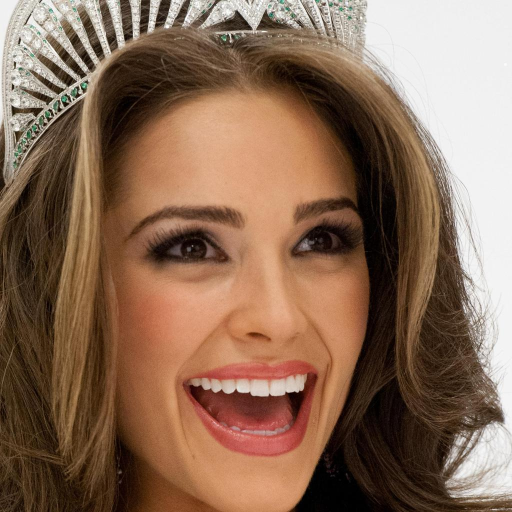

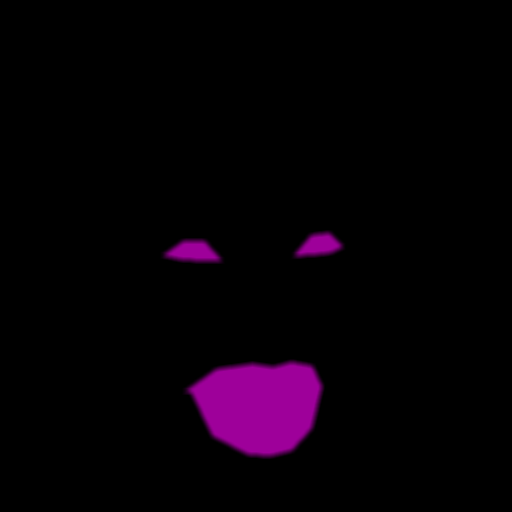

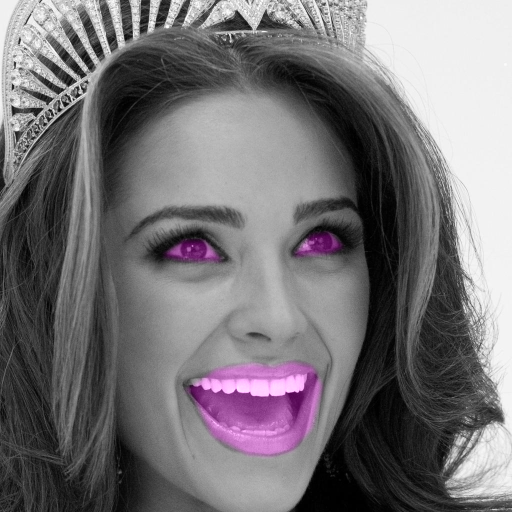

In [79]:
img = cv2.imread("/content/CelebAMask-HQ/CelebA-HQ-img/0.jpg")
img = cv2.resize(img,(0,0),None,0.5,0.5)
imgOriginal = img.copy()
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = detector(imgGray)
for face in faces:
  x1,y1 = face.left(),face.top()
  x2,y2 = face.right(),face.bottom()
  #imgOriginal = cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
  landmarks = predictor(imgGray,face)
  myPoints = []
  for n in range(68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    myPoints.append([x,y])
    #cv2.circle(imgOriginal,(x,y),5,(50,50,255),cv2.FILLED)
    #cv2.putText(imgOriginal,str(n),(x,y-10),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255),1)
  myPoints = np.array(myPoints)
  #imgLeftEye = createBox(img,myPoints[36:42])
  imgLipsEyes = createBox(img,myPoints[36:42],myPoints[42:48],myPoints[48:61],3,True,False)
  imgColorLE = np.zeros_like(imgLipsEyes)
  imgColorLE[:] = 153,0,157
  imgColorLE = cv2.bitwise_and(imgLipsEyes,imgColorLE)
  imgColorLE = cv2.GaussianBlur(imgColorLE,(7,7),10)
  imgOriginalGray = cv2.cvtColor(imgOriginal,cv2.COLOR_BGR2GRAY)
  imgOriginalGray = cv2.cvtColor(imgOriginalGray,cv2.COLOR_GRAY2BGR)
  imgColorLE_Final = cv2.addWeighted(imgOriginalGray,1,imgColorLE,0.5,0)
  #print(myPoints)
cv2_imshow(img)
cv2_imshow(imgColorLE)
cv2_imshow(imgColorLE_Final)